In [1]:
from zipfile import ZipFile

from IPython.display import Image
from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph
from tqdm import tqdm

from database.tools import importers as imp
from database.tools import my_conn
from database.tools.initialization import define_activities, reload_db

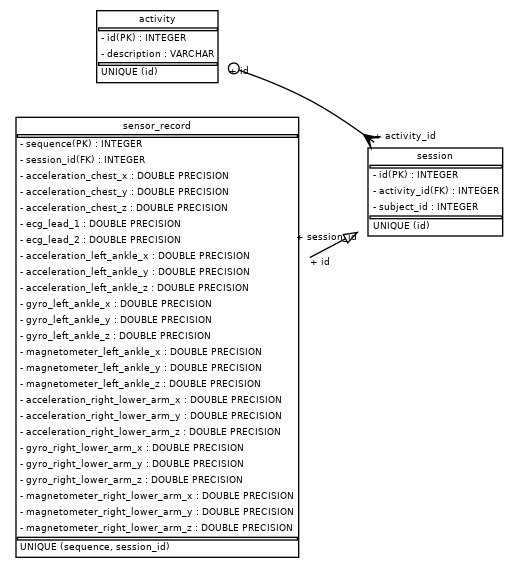

In [2]:
reload_db(my_conn.db_engine)

metadata = MetaData()
metadata.reflect(bind=my_conn.db_engine)
graph = create_schema_graph(
    engine=my_conn.db_engine,
    metadata=metadata,
    font="Times New Roman",
    rankdir="RL",
    show_column_keys=True,
)

png_data = graph.create_png()
Image(data=png_data)

In [3]:
zip_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip"
)
zip_in_memory = imp.download_file_in_memory(zip_url)

Downloading: 75.6MiB [04:44, 266kiB/s] 


In [4]:
with my_conn.get_db_session() as database:
    define_activities(db=database)
    with ZipFile(zip_in_memory) as zip_ref:
        for i in tqdm(range(1, 11), desc="Processing log files"):
            with zip_ref.open(f"MHEALTHDATASET/mHealth_subject{i}.log") as log_file:
                imp.import_data_from_log(db=database, subject_id=i, file=log_file)

Processing log files: 100%|██████████| 10/10 [02:12<00:00, 13.24s/it]
